In [39]:
import pandas as pd

# Read the csv
df = pd.read_csv("../manual/datasets/quality.csv")

In [41]:
# See some information about the set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [42]:
# Overview of first 10 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [34]:
from sklearn.preprocessing import StandardScaler

# Scale down the dataset
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=4),
    'Random Forest': RandomForestRegressor(random_state=4),
    'Gradient Boost': GradientBoostingRegressor(random_state=4),
}

valid_folds = [5,10,15]

result = {}

In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # For current model, we calculate CV for each fold in 'valid_folds'
    cv_scores = {
        f'CV-{fold}': cross_val_score(model, x_train_scaled, y_train, cv=KFold(fold), scoring='r2').mean() for fold in valid_folds
    }

    result[model_name] = {
        "R^2": r2,
        "MAE": mae,
        "MSE": mse,
        **cv_scores,
    }

In [38]:
# Beautify the result
result_df = pd.DataFrame(result).T

print(result_df)

                        R^2       MAE       MSE      CV-5     CV-10     CV-15
SVM                0.449164  0.449554  0.352874  0.375743  0.365634  0.372109
KNN                0.308868  0.511250  0.442750  0.258206  0.243837  0.247662
Linear Regression  0.336950  0.498025  0.424760  0.347116  0.341402  0.341851
Decision Tree      0.068278  0.446875  0.596875 -0.029228 -0.043895 -0.007720
Random Forest      0.528105  0.397656  0.302303  0.426601  0.433238  0.438780
Gradient Boost     0.466704  0.451022  0.341637  0.368108  0.372791  0.375370


In [44]:
import matplotlib.pyplot as graph

model_names = models.keys()

mae_scores = [result[model_name]['MAE'] for model_name in result]
mse_scores = [result[model_name]['MSE'] for model_name in result]
cv5_scores = [result[model_name]['CV-5'] for model_name in result]
cv10_scores = [result[model_name]['CV-10'] for model_name in result]
cv15_scores = [result[model_name]['CV-15'] for model_name in result]

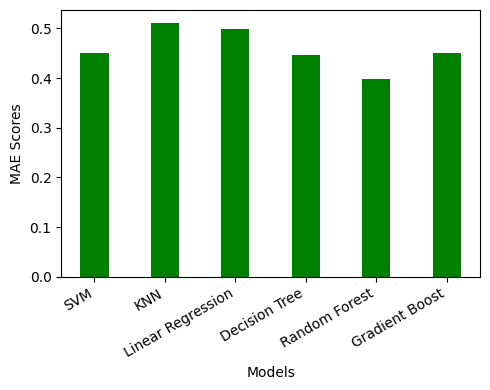

In [74]:
graph.figure(figsize=(5,4))
graph.xlabel("Models")
graph.ylabel("MAE Scores")
graph.bar(model_names, mae_scores, color='green', width=0.4)
graph.xticks(rotation=30, fontsize=10, ha="right")

graph.tight_layout()
graph.show()

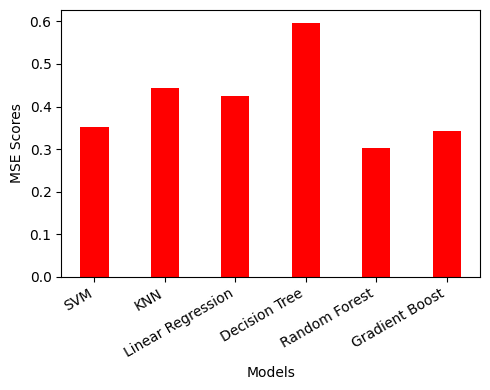

In [76]:
graph.figure(figsize=(5,4))
graph.xlabel("Models")
graph.ylabel("MSE Scores")
graph.bar(model_names, mse_scores, color='red', width=0.4)
graph.xticks(rotation=30, fontsize=10, ha="right")

graph.tight_layout()
graph.show()

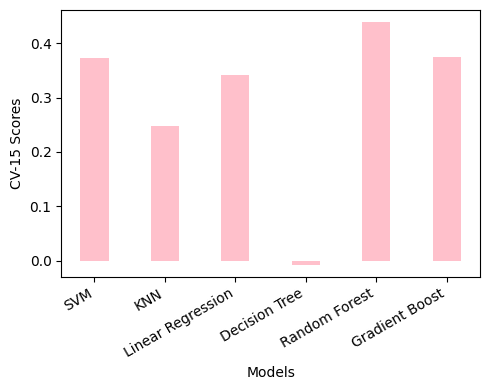

In [80]:
graph.figure(figsize=(5,4))
graph.xlabel("Models")
graph.ylabel("CV-15 Scores")
graph.bar(model_names, cv15_scores, color='pink', width=0.4)
graph.xticks(rotation=30, fontsize=10, ha="right")

graph.tight_layout()
graph.show()

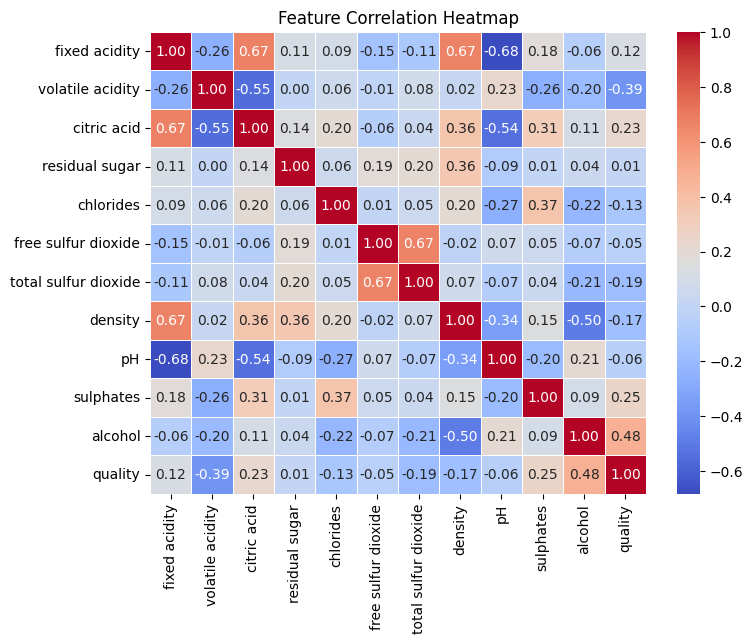

In [86]:
import seaborn as sns

graph.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
graph.title("Feature Correlation Heatmap")
graph.show()